<a href="https://colab.research.google.com/github/Balajiangadi/AIRBNB-Booking-analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

We are going to do in this Dataset is something like:-

1. <b>Understand the problem</b>. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
2. <b>Univariable study</b>. We'll just focus on the dependent variable ('Price') and try to know a little bit more about it.
3. <b>Multivariate study</b>. We'll try to understand how the dependent variable and independent variables relate.
4. <b>Basic cleaning</b>. We'll clean the dataset and handle the missing data, outliers and categorical variables.
5. <b>Test assumptions</b>. We'll check if our data meets the assumptions required by most multivariate techniques.


In [ ]:
#Import pandas package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Let us read our data first**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Data_frame = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Copy of Airbnb NYC 2019.csv')

In [ ]:
Data_frame.shape

(48895, 16)

**Prints the first 2 rows of the dataframe**

In [ ]:
# We can use the head() method
Data_frame.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


**Prints the basic information about our dataframe**

In [ ]:
#We can use the info() method
Data_information = Data_frame.info()
Data_information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Missing data**

Important questions when thinking about missing data:

* How prevalent is the missing data?
* Is missing data random or does it have a pattern?

The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

In [ ]:
#missing data
total = Data_frame.isnull().sum().sort_values(ascending=False)
percent = (Data_frame.isnull().sum()/Data_frame.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(16)

,Total,Percent
last_review,10052,0.205583
reviews_per_month,10052,0.205583
host_name,21,0.000429
name,16,0.000327
id,0,0.000000
host_id,0,0.000000
neighbourhood_group,0,0.000000
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000


To handle missing data, we'll delete all the variables with missing data, except the variable 'host_name' and 'name'.

In [ ]:
#dealing with missing data
Data_frame = Data_frame.drop((missing_data[missing_data['Total'] > 21]).index,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
Data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  calculated_host_listings_count  

**Prints the list of columns in a dataframe**

In [ ]:
#We can use the columns method
all_columns_list = Data_frame.columns
all_columns_list

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

After cleaning the dataset we will do EDA of the datset and in this EDA first thing we will find the neighbourhood group of the NYC and check how many host id belongs to which neighbourhood group.

In [ ]:
#We can use the value_counts() method
group_data1=Data_frame['neighbourhood_group'].value_counts()
group_data1

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

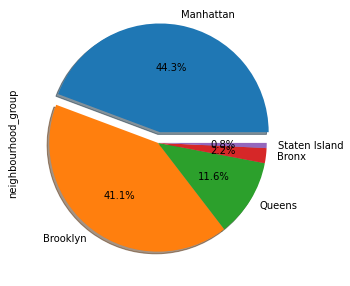

In [ ]:
#pie plot neighbourhood_group
group_data1.plot(kind='pie',autopct='%1.1f%%', explode = [0.1, 0, 0, 0,0], shadow=True,figsize=(10,5))
plt.show()

Second thing we will explore and analyze the data to discover:-
*   Which hosts are the busiest and why?



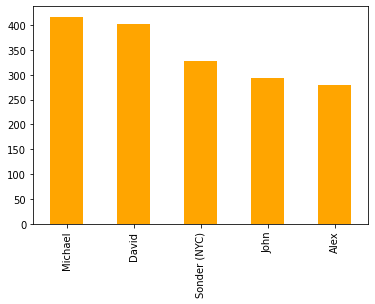

In [ ]:
Busiest_host = Data_frame['host_name'].value_counts().head(5)
Busiest_host.plot(kind='bar',color='orange')
plt.show()

After exploring and analyzing the data we found Michael,David etc.are the busiest host as we can see from above graph.

We will find the overall descriptive summary of the main variable('Price'). 

In [ ]:
#We can use the describe() method
Data_frame['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


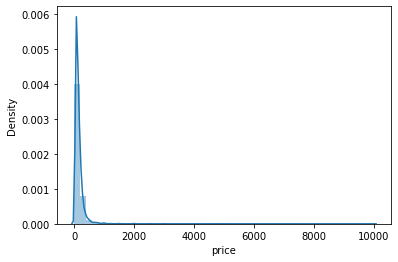

In [ ]:
#histogram
sns.distplot(Data_frame['price'])

**Now analysing 'Price' variable with 'latitude' variable and 'longitude' variable of the data:**

At first, converting latitudes and longitudes in a dataset to points on a map.However, Python’s GeoPandas library exists for this exact purpose, amongst many others.

The next step is to import your libraries. We will need the following, all of which can be installed quickly from the command line with a quick “pip install geopandas” and We will also import shapely.geometry's Point/Polygon functions.

In [ ]:
# import libraries
!pip install geopandas
import geopandas as gpd
from shapely.geometry import Point, Polygon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Next, we must import our map as a **.shp file**. Since we are graphing points representing NYC rental listings, it will probably be useful to use a NYC map! One can be found at https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm:

It’s time to import our .shp file! This is accomplished using the GeoPandas library, the .read_file() function to be specific. We will assign it to the variable street_map.

In [ ]:
# import street map
street_map = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Project/Borough Boundaries/geo_export_4ce608bf-7006-4c57-bb00-fd41faf14e8d.shp')

Once the map and data files are stored, its time for the next steps:
- designate coordinate reference system and assign it to crs variable. For this example we will be using ‘EPSG 4326’. For more information visit http://geopandas.org/projections.html
- add ‘geometry’ column to dataframe. ‘geometry’ column contains the dataframe’s ‘latitude’ & ‘longitude’ columns zipped together using shapely.geometry's Point function
- create GeoPandas dataframe! This is accomplished using GeoPandas’ .GeoDataFrame() function, which takes the dataframe Data_frame, crs coordinates crs, and our new geometry file geometry as inputs





In [ ]:
# designate coordinate system
crs = {'init':'epsg:4326'}

In [ ]:
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(Data_frame['longitude'],Data_frame['latitude'])]

In [ ]:
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(Data_frame,crs = crs,geometry = geometry)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


geo_df.head() shows us our new GeoDataFrame with the ‘geometry’ column added:

In [ ]:
geo_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,geometry
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,POINT (-73.97237 40.64749)
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,POINT (-73.98377 40.75362)


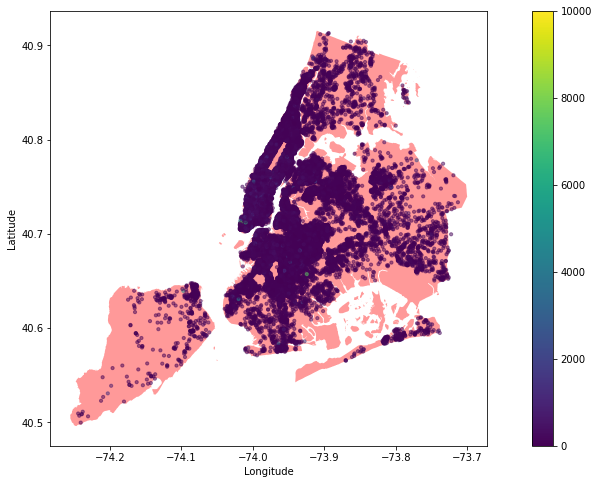

In [ ]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(16,8))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='red')
# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(column='price',ax=ax,alpha=0.5,legend=True,markersize=10)
# add title to graph
plt.title('Rental Prices in NYC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# show map
plt.show()


Now we will explore and analyze the data to discover:-


*   How many types of room and number of different types of room in each neighbourhood group?





In [ ]:
#We can use the value_counts() method
Data_frame['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
#We can use the unique() method
Data_frame['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

here, we found different types of room as:

*   Private room
*   Entire home/apt

*   Shared room





In [ ]:
#create a dataframe for Private room
room_data1 = Data_frame[Data_frame['room_type'] == "Private room"]
private_room_data = room_data1.rename({'room_type':'Private room'},axis=1)
Data1 = private_room_data.groupby(['neighbourhood_group'])['Private room'].count()
Data1

neighbourhood_group
Bronx              652
Brooklyn         10132
Manhattan         7982
Queens            3372
Staten Island      188
Name: Private room, dtype: int64

In [ ]:
#create a dataframe for Entire home/apt room
room_data2 = Data_frame[Data_frame['room_type'] == 'Entire home/apt']
Entire_home_data = room_data2.rename({'room_type':'Entire home/apt'},axis=1)
Data2 = Entire_home_data.groupby(['neighbourhood_group'])['Entire home/apt'].count()
Data2

neighbourhood_group
Bronx              379
Brooklyn          9559
Manhattan        13199
Queens            2096
Staten Island      176
Name: Entire home/apt, dtype: int64

In [ ]:
#create a dataframe for shared room
room_data3 = Data_frame[Data_frame['room_type'] == 'Shared room']
Shared_room_data = room_data3.rename({'room_type':'Shared room'},axis=1)
Data3 = Shared_room_data.groupby(['neighbourhood_group'])['Shared room'].count()
Data3

neighbourhood_group
Bronx             60
Brooklyn         413
Manhattan        480
Queens           198
Staten Island      9
Name: Shared room, dtype: int64

In [ ]:
#we can use concat() method
complete_room_data  = pd.concat([Data1,Data2,Data3],axis=1)
complete_room_data


,Private room,Entire home/apt,Shared room
neighbourhood_group,,,
Bronx,652,379,60
Brooklyn,10132,9559,413
Manhattan,7982,13199,480
Queens,3372,2096,198
Staten Island,188,176,9


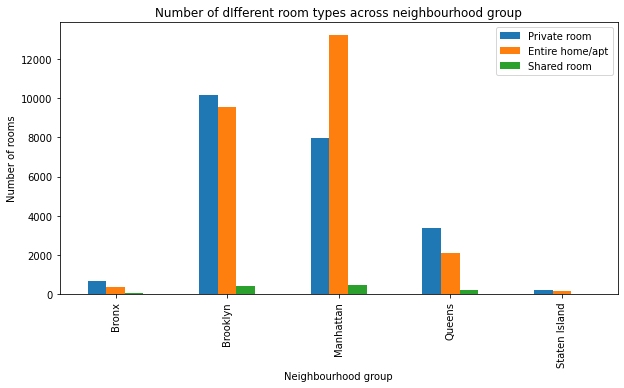

In [ ]:
#plot graph
complete_room_data.plot(kind='bar',figsize=(10,5))
plt.title('Number of dIfferent room types across neighbourhood group')
plt.xlabel('Neighbourhood group')
plt.ylabel('Number of rooms')
plt.show()

After exploring and analyzing the data we found Number of dIfferent room types across neighbourhood group as we can see from above graph.

We will find the overall descriptive summary of the main variable('Price') along different types of rooms.

In [ ]:
Private_price = room_data1.rename({'price':'Private room'},axis=1)
Entire_home_price = room_data2.rename({'price':'Entire home/apt'},axis=1)
Shared_price = room_data3.rename({'price':'Shared room'},axis=1)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


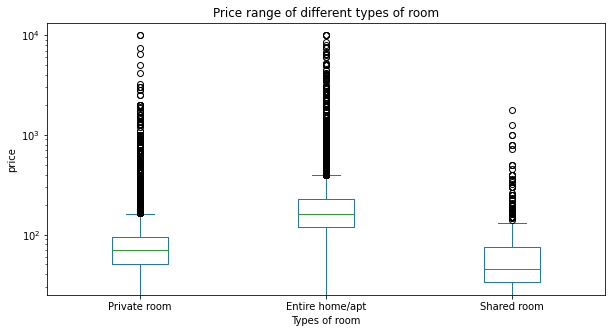

In [ ]:
#plot graph
price_data = pd.concat([Private_price['Private room'],Entire_home_price['Entire home/apt'],Shared_price['Shared room']],axis=1)
price_data.plot(kind='box',figsize=(10,5))
plt.semilogy()
plt.title('Price range of different types of room')
plt.xlabel('Types of room')
plt.ylabel('price')
plt.show()


As we can see from above graph there are Outliers!

# Out liars!

Outliers is also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

Outliers is a complex subject and it deserves more attention. Here, we'll just do a quick analysis through the standard deviation of 'Price' and a set of Box plots.

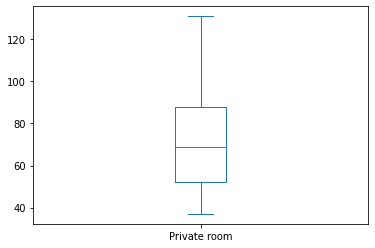

In [ ]:
q1 =price_data['Private room'].quantile(.05)
q3= price_data['Private room'].quantile(.90)

data1=price_data[(price_data['Private room']>=q1) & (price_data['Private room']<=q3)]

q_1 =price_data['Entire home/apt'].quantile(.05)
q_3= price_data['Entire home/apt'].quantile(.85)

data2=price_data[(price_data['Entire home/apt']>=q_1) & (price_data['Entire home/apt']<=q_3)]

q_d =price_data['Shared room'].quantile(.05)
q_g= price_data['Shared room'].quantile(.90)

data3=price_data[(price_data['Shared room']>=q_d) & (price_data['Shared room']<=q_g)]

data1.drop(['Entire home/apt','Shared room'],axis=1).plot(kind='box')
plt.show()


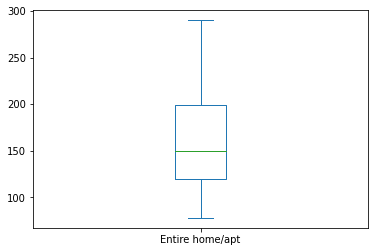

In [ ]:
data2.drop(['Private room','Shared room'],axis=1).plot(kind='box')
plt.show()

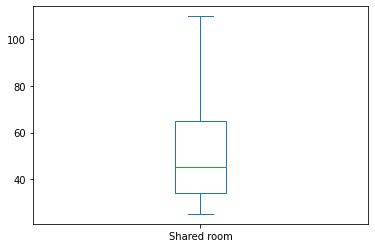

In [ ]:
data3.drop(['Private room','Entire home/apt'],axis=1).plot(kind='box')
plt.show()

Now we will explore and analyze the data to discover:-


*   What are the average price of different types of rooms in each neighbourhood group?

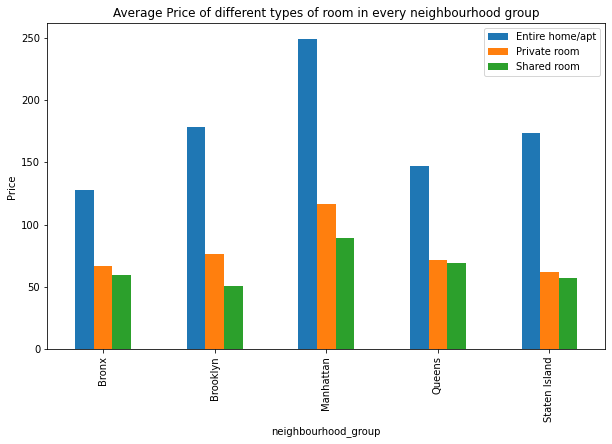

In [ ]:
#plot graph
locationwiseprice_data = Data_frame.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
locationwiseprice_data.plot(kind='bar',figsize=(10,6))
plt.title('Average Price of different types of room in every neighbourhood group')
plt.ylabel('Price')
plt.legend()
plt.show()

After exploring and analyzing the data we found the average price of different types of rooms in each neighbourhood group as we can see from above graph.

Now we will explore and analyze the data to discover:-


*   What are the number of visits in different types of rooms in each neighbourhood group?

In [ ]:
#we can use groupby() method
review_data = Data_frame.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].sum().unstack()
review_data

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,11627,16312,432
Brooklyn,267128,213653,5793
Manhattan,235147,209150,10272
Queens,60644,93561,2745
Staten Island,5857,5670,14


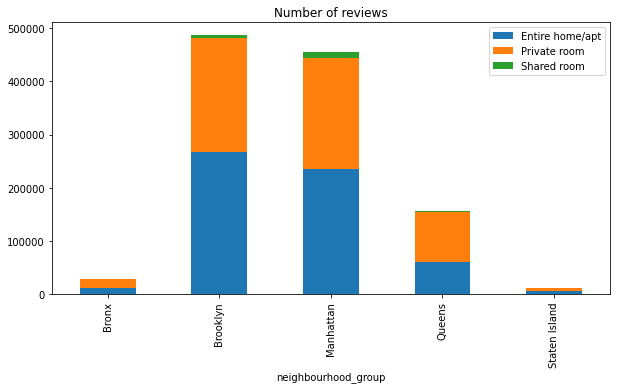

In [ ]:
#plot graph
review_data.plot(kind='bar',stacked=True,figsize=(10,5))
plt.title('Number of reviews')
plt.legend()
plt.show()

After exploring and analyzing the data we found the number of visits in different types of rooms in each neighbourhood group as we can see from above graph.

On the basis of number of reviews we will find the maximum number of visits in neighbourhood in each neighbourhood_group.

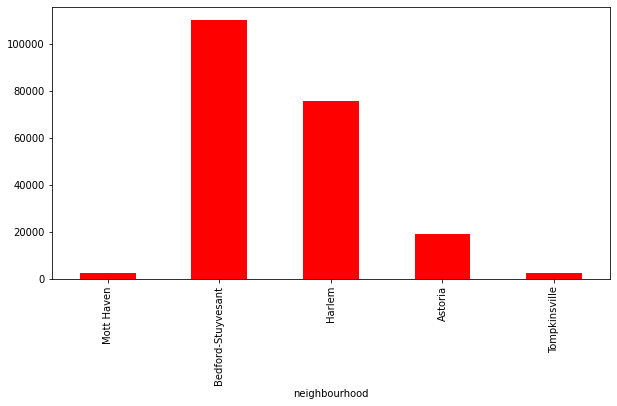

In [ ]:
visit_data1 = Data_frame[Data_frame['neighbourhood_group']=='Bronx'].groupby(['neighbourhood'])['number_of_reviews'].sum().sort_values(ascending=False).head(1)
visit_data2 = Data_frame[Data_frame['neighbourhood_group']=='Brooklyn'].groupby(['neighbourhood'])['number_of_reviews'].sum().sort_values(ascending=False).head(1)
visit_data3 = Data_frame[Data_frame['neighbourhood_group']=='Manhattan'].groupby(['neighbourhood'])['number_of_reviews'].sum().sort_values(ascending=False).head(1)
visit_data4 = Data_frame[Data_frame['neighbourhood_group']=='Queens'].groupby(['neighbourhood'])['number_of_reviews'].sum().sort_values(ascending=False).head(1)
visit_data5 = Data_frame[Data_frame['neighbourhood_group']=='Staten Island'].groupby(['neighbourhood'])['number_of_reviews'].sum().sort_values(ascending=False).head(1)
pd.concat([visit_data1,visit_data2,visit_data3,visit_data4,visit_data5]).plot(kind='bar',color='red',figsize=(10,5))
plt.show()

# Conclusion

That's it! We reached the end of our exercise.

Throughout this dataset we put in practice many of the strategies and We
philosophied about the variables, we analysed 'Price' alone and with the most correlated variables, we dealt with missing data and outliers, we tested some of the fundamental statistical assumptions and we even transformed categorial variables into dummy variables. That's a lot of work that Python helped us make easier.